In [1]:
import pandas as pd # for manupulationg of file 
import matplotlib.pyplot as plt
chur= pd.read_csv("D:/R and python practice/Module 6/assignment/DataSets (7)/emp_data.csv")
chur


,Salary_hike,Churn_out_rate
0,1580,92
1,1600,85
2,1610,80
3,1640,75
4,1660,72
5,1690,70
6,1706,68
7,1730,65
8,1800,62
9,1870,60


In [2]:
chur.columns = "x","y"

In [7]:
chur.all(axis="columns")

0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
9    True
dtype: bool

In [8]:
chur.all(axis=None) # checking na value none 

True

In [10]:
chur.describe() # mean median mode 

,x,y
count,10.000000,10.000000
mean,1688.600000,72.900000
std,92.096809,10.257247
min,1580.000000,60.000000
25%,1617.500000,65.750000
50%,1675.000000,71.000000
75%,1724.000000,78.750000
max,1870.000000,92.000000


#####################Exploratory DATA Annalyis#################################

Univariate annalysis

<BarContainer object of 10 artists>

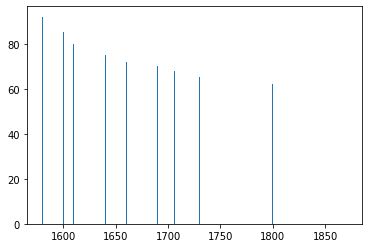

In [13]:
# Basic Bar plot 
plt.bar(x= chur["x"],height = chur["y"]) # barplot visualization x and y as height

<BarContainer object of 10 artists>

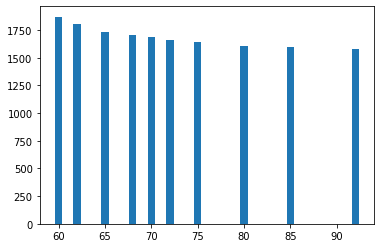

In [14]:
plt.bar(x=chur["y"],height=chur["x"]) # bar plot 

<BarContainer object of 10 artists>

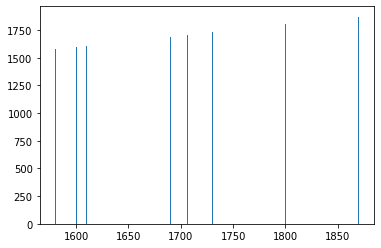

In [18]:
plt.bar(x= chur["x"],height = chur["x"]) # same plot  data is not visible 

<BarContainer object of 10 artists>

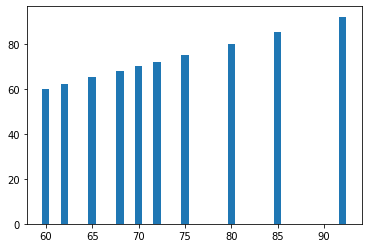

In [19]:
# Basic barplot understandig data increasing viaualization 
plt.bar(x= chur["y"],height = chur["y"]) # barplot visualization x column increasing order

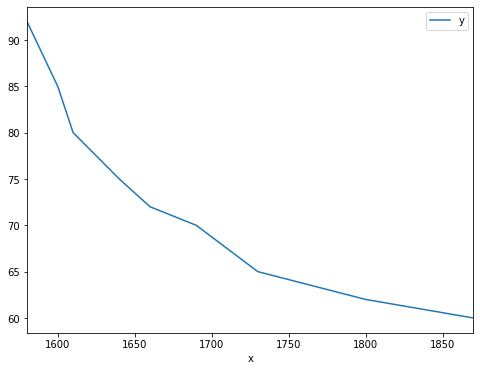

In [28]:
chur.plot.line(x= "x", y ="y", figsize=(8,6))

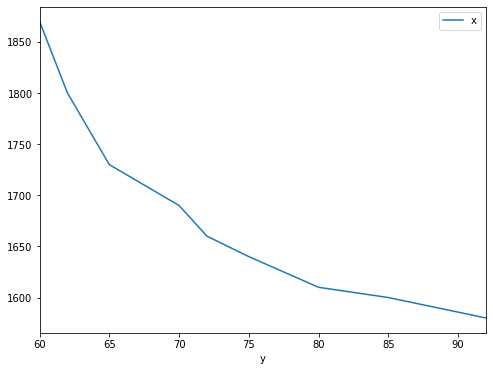

In [29]:
chur.plot.line(x="y",y = "x", figsize=(8,6)) # line plot y and x data visualization


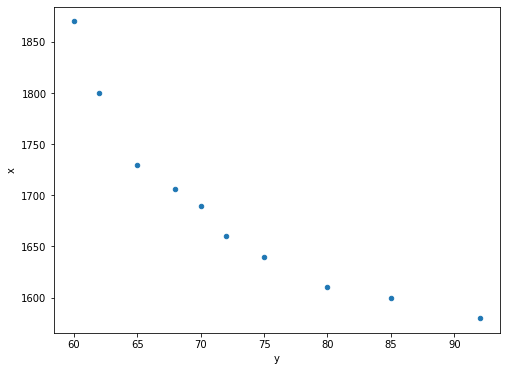

In [30]:
chur.plot.scatter(x="y",y = "x", figsize=(8,6)) # line plot y and x data visualization


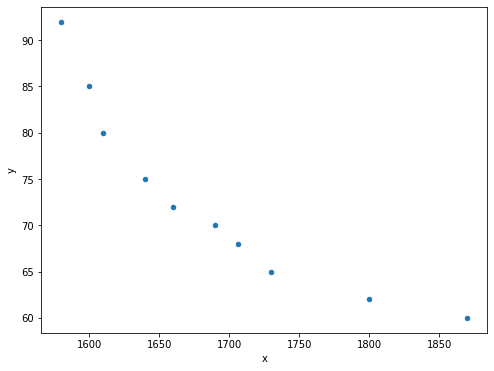

In [32]:
chur.plot.scatter(x="x",y = "y", figsize=(8,6)) # line plot y and x data visualization


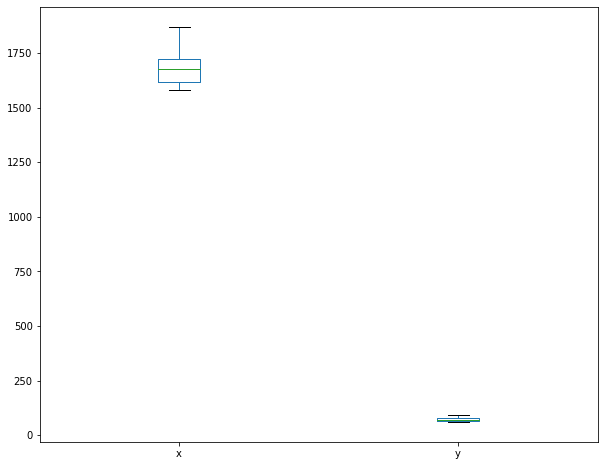

In [36]:
chur.plot.box(figsize=(10,8)) # no outliers 

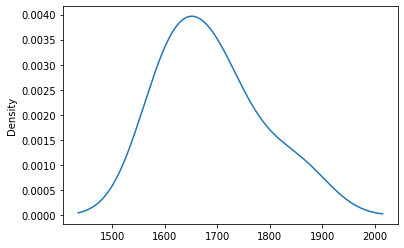

In [38]:
chur["x"].plot.kde()

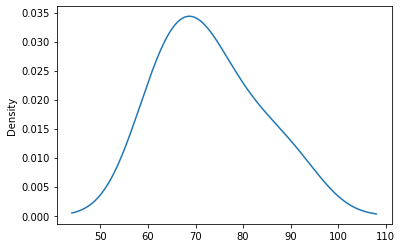

In [39]:
chur["y"].plot.kde()

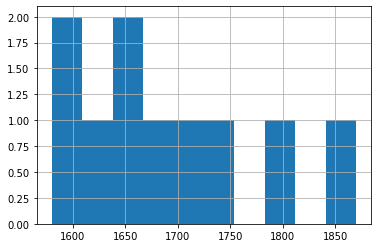

In [43]:
chur["x"].hist()

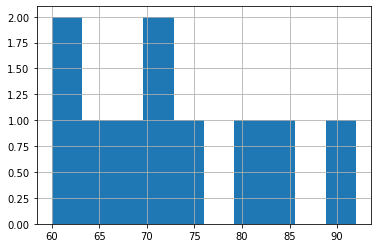

In [44]:
chur['y'].hist()

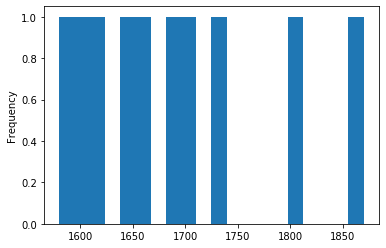

In [47]:
chur['x'].plot(kind = 'hist',bins = 20)

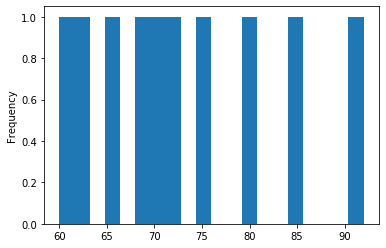

In [48]:
chur['y'].plot(kind = 'hist',bins = 20)

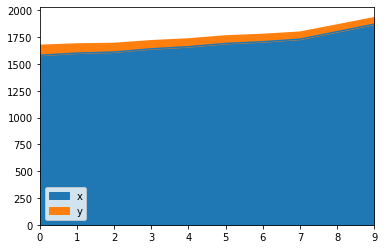

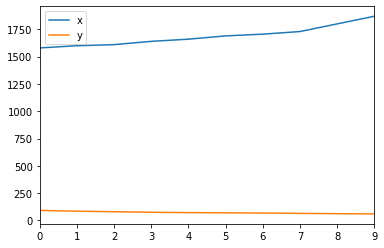

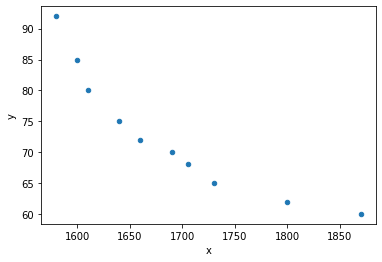

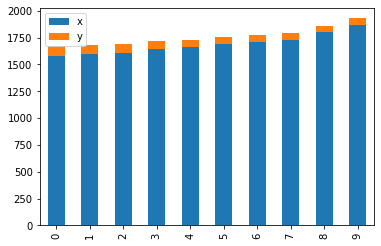

In [56]:
#Bivariate Annalyysis
chur.plot.area()
chur.plot.line()
chur.plot.scatter(x='x',y='y')
chur.plot.bar(stacked = True)


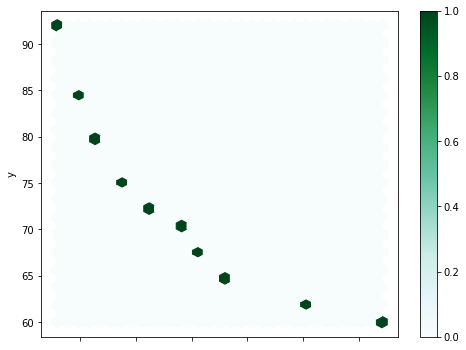

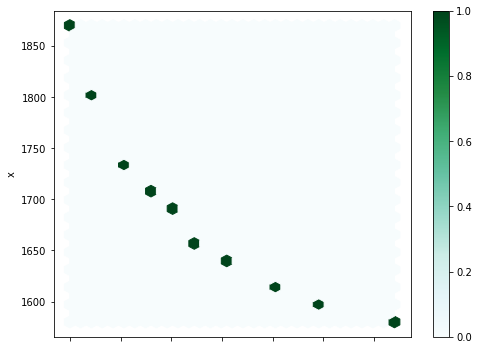

In [58]:
#Hexagon intersection plot to see more data point joints bi variate annalysis
chur.plot.hexbin(x='x', y='y', gridsize=30, figsize=(8,6)) # intersecting point is more darker 
chur.plot.hexbin(x='y', y='x', gridsize=30, figsize=(8,6)) # intersecting point is more darker 

In [59]:
import numpy as np
#import statsmodels.api as sm
import statsmodels.formula.api as smf

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


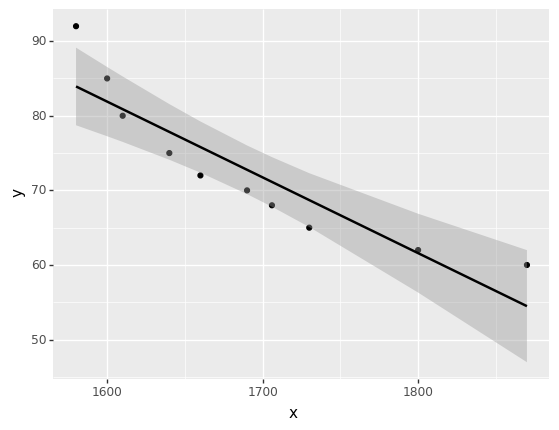

<ggplot: (-9223371925561233252)>

In [61]:
from plotnine import *
(ggplot(chur,aes("x","y"))+geom_point())+stat_smooth(method = 'lm') # Scattarplot and with abline 


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     39.40
Date:                Sat, 16 May 2020   Prob (F-statistic):           0.000239
Time:                        18:13:40   Log-Likelihood:                -28.046
No. Observations:                  10   AIC:                             60.09
Df Residuals:                       8   BIC:                             60.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    244.3649     27.352      8.934      0.000     181.291     307.439
x             -0.1015      0.016     -6.277      0.000      -0.139      -0.064
==============================================================================
Omnibus:                        2.201   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.333   Jarque-Bera (JB):                1.408
Skew:                           0.851   Prob(JB):                        0.495
Kurtosis:                       2.304   Cond. No.                     3.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

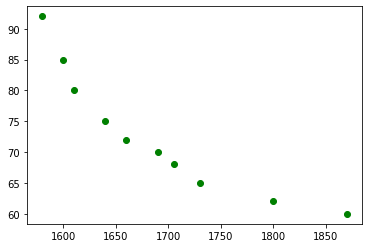

In [63]:
##### MODEL BUILDING ########
#model 1 
plt.scatter(x=chur['x'], y=chur['y'],color='green')# Scatter plot
np.corrcoef(chur.x, chur.y) #correlation
mod = smf.ols('y ~ x', data=chur).fit()
mod.summary() # to see the summary of out model

In [64]:
pred1 = mod.predict(pd.DataFrame(chur['x'])) # model prediction 
pred1

0    83.927531
1    81.896678
2    80.881252
3    77.834973
4    75.804120
5    72.757840
6    71.133158
7    68.696134
8    61.588149
9    54.480164
dtype: float64

In [65]:
#printing level of interval for confidence
print (mod.conf_int(0.01)) # 99% confidence interval

                    0           1
Intercept  152.588569  336.141253
x           -0.155821   -0.047265


In [67]:
res = chur.y - pred1
res

0    8.072469
1    3.103322
2   -0.881252
3   -2.834973
4   -3.804120
5   -2.757840
6   -3.133158
7   -3.696134
8    0.411851
9    5.519836
dtype: float64

In [68]:
#rmse
sqres = res*res
mse = np.mean(sqres)
rmse = np.sqrt(mse)
rmse

3.997528462337793

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     44.85
Date:                Sat, 16 May 2020   Prob (F-statistic):           0.000153
Time:                        18:17:15   Log-Likelihood:                -27.502
No. Observations:                  10   AIC:                             59.00
Df Residuals:                       8   BIC:                             59.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1381.4562    195.402      7.070      0.000     930.858    1832.054
np.log(x)   -176.1097     26.297     -6.697      0.000    -236.751    -115.468
==============================================================================
Omnibus:                        2.213   Durbin-Watson:                   0.571
Prob(Omnibus):                  0.331   Jarque-Bera (JB):                1.418
Skew:                           0.853   Prob(JB):                        0.492
Kurtosis:                       2.298   Cond. No.                     1.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

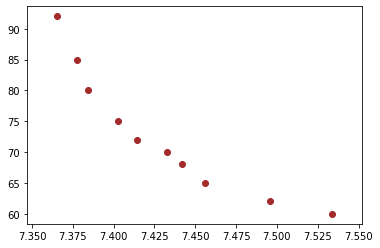

In [69]:
# model 2 
######### Modeli building on Transformed Data

# Log Transformation

plt.scatter(x=np.log(chur['x']),y=chur['y'],color='brown')
np.corrcoef(np.log(chur.x), chur.y) #correlation
# linear model 2 
model2 = smf.ols('y ~ np.log(x)',data=chur).fit()
model2.summary()

In [70]:
# prediction
pred2 = model2.predict(pd.DataFrame(chur['x']))
pred2

0    84.376270
1    82.161024
2    81.063764
3    77.812415
4    75.677725
5    72.523437
6    70.863969
7    68.403723
8    61.418285
9    54.699388
dtype: float64

In [71]:
# printing inter val level of confidence 
print(model2.conf_int(0.01)) # 99% confidence level

                    0            1
Intercept  725.806856  2037.105529
np.log(x) -264.347078   -87.872392


In [72]:
# residuals
res2 = chur.y - pred2
res2

0    7.623730
1    2.838976
2   -1.063764
3   -2.812415
4   -3.677725
5   -2.523437
6   -2.863969
7   -3.403723
8    0.581715
9    5.300612
dtype: float64

In [73]:
# rmse of second model
sqres2 = res2*res2
mse2 = np.mean(sqres2)
rmse2 = np.sqrt(mse2)
rmse2


3.7860036130227708

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              np.log(y)   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     55.26
Date:                Sat, 16 May 2020   Prob (F-statistic):           7.38e-05
Time:                        18:20:49   Log-Likelihood:                 16.511
No. Observations:                  10   AIC:                            -29.02
Df Residuals:                       8   BIC:                            -28.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.6383      0.318     20.902      0.000       5.906       7.371
x             -0.0014      0.000     -7.434      0.000      -0.002      -0.001
==============================================================================
Omnibus:                        1.935   Durbin-Watson:                   0.585
Prob(Omnibus):                  0.380   Jarque-Bera (JB):                1.314
Skew:                           0.780   Prob(JB):                        0.519
Kurtosis:                       2.152   Cond. No.                     3.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

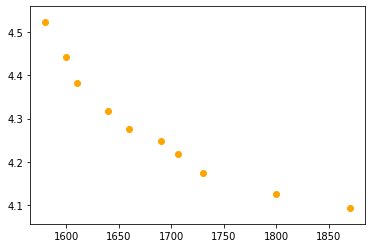

In [74]:
# Exponential transformation
plt.scatter(x=chur['x'], y=np.log(chur['y']),color='orange')

np.corrcoef(chur.x, np.log(chur.y)) #correlation

model3 = smf.ols('np.log(y) ~ x',data=chur).fit()
model3.summary()

In [75]:
# predictions
pred_log = model3.predict(pd.DataFrame(chur['x']))
pred_log

0    4.432091
1    4.404164
2    4.390201
3    4.348311
4    4.320384
5    4.278494
6    4.256153
7    4.222641
8    4.124897
9    4.027154
dtype: float64

In [76]:
pred3 = np.exp(pred_log)
pred3

0    84.107097
1    81.790758
2    80.656622
3    77.347701
4    75.217518
5    72.131736
6    70.538084
7    68.213379
8    61.861455
9    56.101012
dtype: float64

In [77]:
# printing the confidence interval
print(model3.conf_int(0.01)) # 99% confidence level

                  0         1
Intercept  5.572635  7.703965
x         -0.002027 -0.000766


In [79]:
# residuals 
res3 = chur.x - pred3
res3

0    1495.892903
1    1518.209242
2    1529.343378
3    1562.652299
4    1584.782482
5    1617.868264
6    1635.461916
7    1661.786621
8    1738.138545
9    1813.898988
dtype: float64

In [80]:
#rmse of third 
sqres3 = res3*res3
mse3 = np.mean(sqres3)
rmse3 = np.sqrt(mse3)
rmse3

1618.6440955798234